Вам тоже показалось, что предыдущие части этой лабораторной были какими-то лёгкими? Если да, то так и есть, их можно решить за одну простенькую строку кода! В заключительной части нулевой лаборатоной работы чуть-чуть сложнее. В ней Вы познакомитесь (если уже не) с библиотекой OpenCV, которая предоставляет реализации многих классических алгоритмов обработки изображений и компьютерного/машинного зрения. Эта библиотека доступна не только для Python, но и для ряда других языков программирования. Библиотека OpenCV на Python использует библиотеку NumPy: массивы OpenCV конвертируются в массивы NumPy и обратно. Но с NumPy вы уже знакомы. В этот раз знакомство с OpenCV будет достаточно поверхностное. Более подробно Вы познакомитесь с ней в отдельной лабораторной работе (наверное).

Импортировать NumPy и OpenCV можно следующим образом (выполните один раз):

In [24]:
import numpy
import cv2

Задача 0.c "Hello OpenCV". Необходимо реализовать функцию, которая принимает на входе изображение, переводит его в оттенки серого и возвращает гистограмму - NumPy массив с формой (256, ) и типом int, в элементах которого находится количество пикселей, которые имеют цвет (в оттенках серого) соответствующий индексу элемента. Вариант всего один.

Пример: изображение на входе:

![Lenna](https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png)

массив на выходе:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    6   20
   29   59   97  137  181  220  301  421  500  612  760  940 1062 1254
 1443 1646 1761 1882 1998 2092 2020 2105 2086 2029 1979 1808 1731 1668
 1578 1469 1278 1236 1220 1003  930  976  880  890  791  797  771  780
  852  819  832  785  879  909  868  854  947  973  905  913  867  935
  932  967 1008 1016 1063 1134 1120 1190 1218 1325 1399 1538 1621 1806
 1871 2086 1894 1933 1956 1836 1761 1729 1612 1504 1435 1366 1362 1344
 1345 1451 1359 1355 1384 1448 1568 1572 1604 1776 1817 1894 2029 2140
 2304 2321 2369 2521 2306 2304 2252 2078 1992 1822 1933 1903 2025 2136
 2260 2304 2327 2453 2459 2408 2236 2316 2287 2174 2282 2316 2391 2592
 2691 2740 2705 2552 2414 2261 2041 1853 1779 1616 1474 1425 1352 1234
 1253 1196 1170 1208 1342 1263 1233 1158 1186 1224 1086  943  904  822
  786  689  609  630  643  679  634  664  739  795  830  941  905  976
  920  910  843  822  868  903  834  886  909  969  976 1066 1042 1068
  957  981  955  866  697  544  490  394  381  284  230  234  194  188
  126   77   74   59   51   22   19    9    7    6    8    1    0    0
    1    0    0    0    2    0    1    1    0    0    0    0    0    0
    0    0    0    0]

Для начала выполните следующий вспомогательный код один раз

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from json import dumps, loads

server = "https://eztester.agridnev.com"
task_id = 3

def show_image(image):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

def show_hist(hist):
  plt.plot(hist)
  plt.xlim([0,256])
  plt.ylim([0,hist.max()+1])
  plt.show()

def auto_test(func):
  response = urllib.request.urlopen(server + "/task/" + str(task_id) + "?secret=" + secret)
  token = response.read().decode("utf-8")
  results = []
  for case in range(5):
    response = urllib.request.urlopen(server + "/data/image.jpg?case=" + str(case) + "&token=" + token)
    image = cv2.imdecode(numpy.asarray(bytearray(response.read()), dtype="uint8"), cv2.IMREAD_COLOR)
    show_image(image)
    result = func(image)
    show_hist(result)
    results.append(result.tolist())
  req = urllib.request.Request(server + "/solution?token=" + token)
  req.add_header("Content-Type", "application/json")
  data = dumps(results).encode('utf-8')
  req.add_header('Content-Length', len(data))
  response = urllib.request.urlopen(req, data)
  print("Passed! First time passed:", response.read().decode("utf-8"))

def print_info():
  response = urllib.request.urlopen(server + "/user?secret=" + secret)
  info = loads(response.read().decode("utf-8"))
  print("Full name:", info["name"])
  print("Group:", info["group"])
  print("Tasks: (id --- name --- solution)")
  for id in info["tasks"]:
    task = info["tasks"][id]
    print(id, "---", task["name"], "---", task["solution"])

Далее введите свой секрет (Вы уже должны были использовать его в предыдущей части лабораторной работы). Держите секрет в секрете!

In [8]:
secret = "faaf64fa1f4b461fa2d627ffaec3ce4a"

Теперь ниже реализуйте функцию, которая требудется по условию задания

In [25]:
def your_function(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  result = np.array([numpy.count_nonzero(gray == x) for x in range(256)])
  return result

Теперь самостоятельно проверьте, как она работает

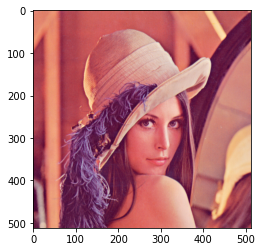

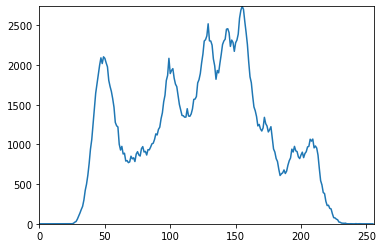

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    6   20
   29   59   97  137  181  220  301  421  500  612  760  940 1062 1254
 1443 1646 1761 1882 1998 2092 2020 2105 2086 2029 1979 1808 1731 1668
 1578 1469 1278 1236 1220 1003  930  976  880  890  791  797  771  780
  852  819  832  785  879  909  868  854  947  973  905  913  867  935
  932  967 1008 1016 1063 1134 1120 1190 1218 1325 1399 1538 1621 1806
 1871 2086 1894 1933 1956 1836 1761 1729 1612 1504 1435 1366 1362 1344
 1345 1451 1359 1355 1384 1448 1568 1572 1604 1776 1817 1894 2029 2140
 2304 2321 2369 2521 2306 2304 2252 2078 1992 1822 1933 1903 2025 2136
 2260 2304 2327 2453 2459 2408 2236 2316 2287 2174 2282 2316 2391 2592
 2691 2740 2705 2552 2414 2261 2041 1853 1779 1616 1474 1425 1352 1234
 1253 1196 1170 1208 1342 1263 1233 1158 1186 1224 1086  943  904  822
  786  689  609  630  643  679  634  664  739  795  830  941  905  976
  920 

In [26]:
with urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png") as response:
  image = cv2.imdecode(numpy.asarray(bytearray(response.read()), dtype="uint8"), cv2.IMREAD_COLOR)
  show_image(image)
  result = your_function(image)
  show_hist(result)
  print(result)

Если всё хорошо, настало время автоматической проверки

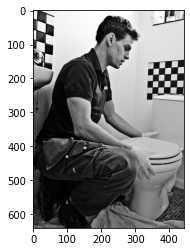

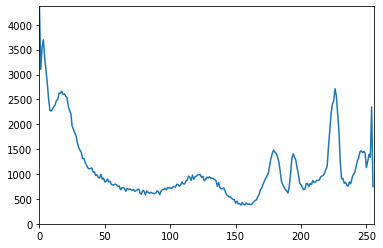

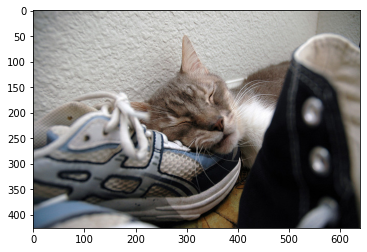

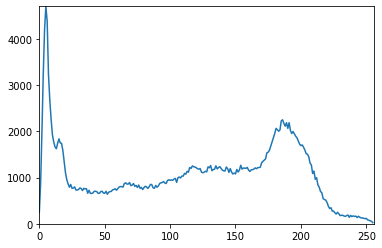

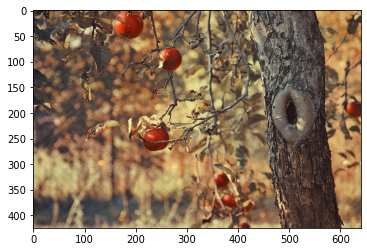

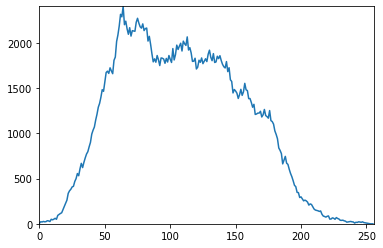

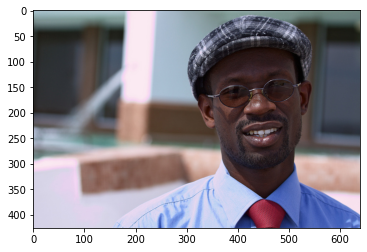

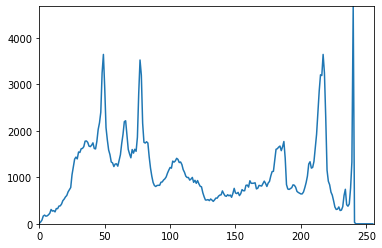

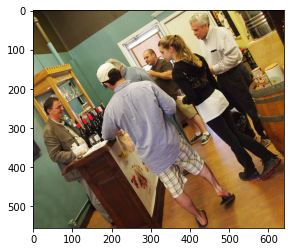

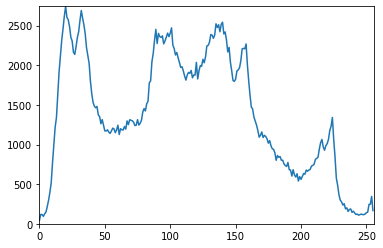

Passed! First time passed: "2021-09-09T11:06:22.783564"


In [27]:
auto_test(your_function)

Как и в прошлый раз, если Вы увидели "Passed!", значит всё ОК, скидывайте решение в расшаренную преподавателю папку на Google Drive.

Если же Вы увидели какую-то ошибку, что-то пошло не так. Возможные причины:
* код 408 - между полученим данных и отправкой результатов прошло слишком много времени (для этой задачи стоит ограничение в 15 секунд на все 5 тестов вместе)
* код 418 - неверное решение (что именно в нём неправильно - система не скажет)

Также Вы можете посмотреть информацию о себе в системе (ФИО, группу, список доступных заданий и результаты их выполнения):

In [ ]:
print_info()

Если у Вас зачтены все 3 части нулевой лабораторной работы - поздравляем! Скоро добавим что-нибудь ещё :)